In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist =keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [4]:
class_names =["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

### reshaping the data 
4d array as input for CNN (height,width,channel)

In [5]:
X_train_full=X_train_full.reshape((60000,28,28,1))
X_test=X_test.reshape((10000,28,28,1))

### Data normalization

In [6]:
X_train_n=X_train_full/255
X_test_n=X_test/255

### splitting data into train/validation/test datasets 

In [7]:
X_valid,X_train=X_train_n[:5000],X_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test =X_test_n

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="valid",activation="relu",input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))  
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))      

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
model_history = model.fit(X_train, y_train, epochs=30,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 37s 44ms/step - loss: 0.8776 - accuracy: 0.6987 - val_loss: 0.7478 - val_accuracy: 0.7382
Epoch 2/30
860/860 [==============================] - 37s 43ms/step - loss: 0.5388 - accuracy: 0.8051 - val_loss: 0.4977 - val_accuracy: 0.8146
Epoch 3/30
860/860 [==============================] - 39s 45ms/step - loss: 0.4812 - accuracy: 0.8263 - val_loss: 0.9226 - val_accuracy: 0.7102
Epoch 4/30
860/860 [==============================] - 38s 44ms/step - loss: 0.4440 - accuracy: 0.8414 - val_loss: 0.4138 - val_accuracy: 0.8564
Epoch 5/30
860/860 [==============================] - 37s 44ms/step - loss: 0.4198 - accuracy: 0.8499 - val_loss: 0.4423 - val_accuracy: 0.8450
Epoch 6/30
860/860 [==============================] - 38s 44ms/step - loss: 0.3957 - accuracy: 0.8582 - val_loss: 0.3762 - val_accuracy: 0.8716
Epoch 7/30
860/860 [==============================] - 38s 45ms/step - loss: 0.3782 - accuracy: 0.8659 - val_loss: 0.4055 - val_accuracy:

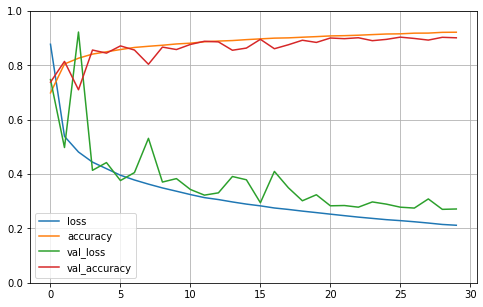

In [13]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
ev =model.evaluate(X_test_n,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2812 - accuracy: 0.8984


In [17]:
X_new=X_test[:3]

In [18]:
y_pred=model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [19]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


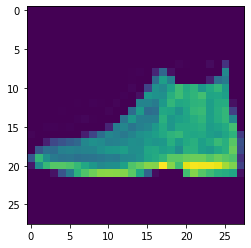

In [20]:
print(plt.imshow(X_test[0].reshape(28,28)))

In [21]:
model.save("cnn1.h5")

In [22]:
keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session()>

In [23]:
del model

### Pooling vs No Pooling

In [24]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


In [25]:
model_a.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [26]:
model_b.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [29]:
model_history_a = model_a.fit(X_train, y_train, epochs=1,batch_size= 64,
                    validation_data=(X_valid, y_valid))


860/860 [==============================] - 37s 43ms/step - loss: 0.5550 - accuracy: 0.7978 - val_loss: 0.6319 - val_accuracy: 0.7716


In [30]:
model_history_b = model_b.fit(X_train, y_train, epochs=1,batch_size= 64,
                    validation_data=(X_valid, y_valid))

860/860 [==============================] - 71s 82ms/step - loss: 0.7401 - accuracy: 0.7452 - val_loss: 0.7079 - val_accuracy: 0.7560
